# Cardiovascular Disease Prediction
![cardio_vasc](https://i2.wp.com/thejournalofmhealth.com/wp-content/uploads/2019/07/Sensyne-Health-Partners-with-Bayer-to-Accelerate-New-Treatments-for-Cardiovascular-Disease.jpg?resize=777%2C437&ssl=1)

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots.

The dataset consists of 69301 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

**Task** - To predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

*   *Objective:* factual information
*   *Examination:* results of medical examination
*   *Subjective:* information given by the patient


| Feature | Variable Type | Data Type | Variable| Value Type |
|---------|--------------|--------|----------|------------|
| Age | Objective Feature | Continous (Ratio) | age | int (days) |
| Height | Objective Feature | Continous (Interval) | height | int (cm) |
| Weight | Objective Feature | Continous (Interval) | weight | float (kg) |
| Gender | Objective Feature | Categorical (Nominal) | gender | categorical code |
| Systolic blood pressure | Examination Feature | Continous (Interval) | ap_hi | int |
| Diastolic blood pressure | Examination Feature | Continous (Interval) | ap_lo | int |
| Cholesterol | Examination Feature |  Categorical (Ordinal) | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | Categorical (Ordinal) | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | Categorical (Nominal) | smoke | binary |
| Alcohol intake | Subjective Feature | Categorical (Nominal) | alco | binary |
| Physical activity | Subjective Feature | Categorical (Nominal) | active | binary |
| cardiovascular disease | Target Variable | Categorical (Nominal) | cardio | binary |

*All of the dataset values were collected at the moment of medical examination.*

Credits for Dataset : [Svetlana Ulianova](https://www.kaggle.com/sulianova)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # for visualization
import seaborn as sns # for visualization
import sklearn # for scientific calculations
from sklearn import preprocessing
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

### Data Collection & Cleaning

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
# Data Loading
df_raw = pd.read_csv("cardio_train.csv")
df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Basic information about dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are 70000 entries of patient records. 

In [ ]:
# Checking any missing values
df_raw.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

From this we can assume that there is 0 Null values in the dataset

In [ ]:
# Checking for any duplicate values in dataset
df_raw.duplicated().sum()

0

There are 0 duplicate values in the dataset.

From this data cleaning process we can conclude that the dataset is good to go for analysing process. 

### Data Understanding ( EDA & Visualizations )

As we know there are three types of input features. We can analyse the features by their feature category for better understanding.

Cardio Vascular Disease is often cauesd by Atherosclerosis.

Atherosclerosis refers to the buildup of fats, cholesterol and other substances in and on your artery walls (plaque), which can restrict blood flow. The plaque can burst, triggering a blood clot. Although atherosclerosis is often considered a heart problem, it can affect arteries anywhere in your body.

![aero](https://qph.fs.quoracdn.net/main-qimg-08f17da9dfa8fc92e255a55b4826160b)

There are two type of causes for this disease :

**Non-Modifiable Cause:**
* Old Age
* Heridity 
* Gender Factor such as Male

**Modifiable Cause:**
* Alcohol & Smoking 
* Poor Diet
* Lack of Excersie 
* Obesity
* Poor Sleep

Researching about the disease and comparing with our dataset we can find the features are relating with the disease cause.


Let us start with non-modifiable cause such as age, gender, bmi.

As ages are in number of days let us caluclate the age and categorize.

In [ ]:
# Convert the ages from number of days to categorical values
def calculate_age(days):
  days_year = 365.2425
  age = int(days // days_year)
  return age

# According to US National Library of Medicine National Institutes of Health the age groups are classified
def categorize_age(age):
  if 0 < age <= 2:
    return "Infants"
  elif 2 < age <= 5:
    return "Pre School Child"
  elif 5 < age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Adolescent"
  elif 19 < age <= 24:
    return "Young Adult"
  elif 24 < age <= 44:
    return "Adult"
  elif 44 < age <= 65:
    return "Middle Aged"
  elif 65 < age:
    return "Aged"

def categorize_age_tees(age):
  if 0 < age <= 10:
    return "10s"
  elif 10 < age <= 30:
    return "20s"
  elif 20 < age <= 30:
    return "30s"
  elif 30 < age <= 40:
    return "40s"
  elif 40 < age <= 50:
    return "50s"
  elif 50 < age <= 60:
    return "60s"
  elif 60 < age <= 70:
    return "70+"

In [ ]:
# age transformations
df_raw['age_new'] = df_raw['age'].apply(lambda x: calculate_age(x))
df_raw['age_cat'] = df_raw['age_new'].apply(lambda x: categorize_age(x))
df_raw['age_tees'] = df_raw['age_new'].apply(lambda x: categorize_age_tees(x))
df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_new,age_cat,age_tees
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Middle Aged,50s
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Middle Aged,60s
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Middle Aged,60s
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Middle Aged,50s
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Middle Aged,50s


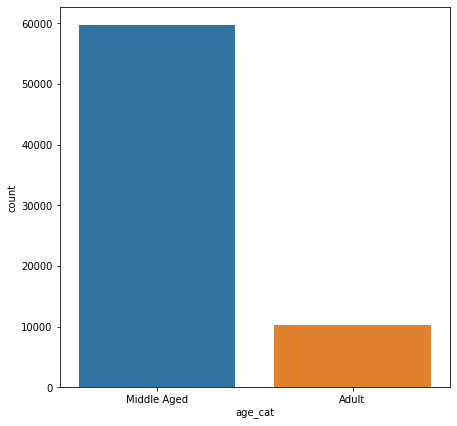

In [ ]:
# Visulization of age groups
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', data = df_raw) 

From this graph information , the dataset contains **majorly of Middle Aged** people data and **minor of Adult** data. 

Let us look by how many of the people got affected by CVD & not by their age group.

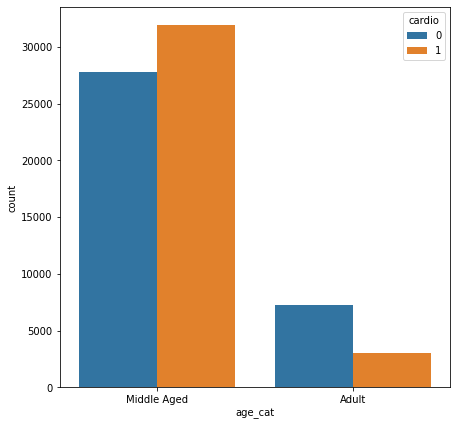

In [ ]:
# Visulization of age groups with cvdd info
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', hue = 'cardio', data = df_raw) 

The graph says mostly middle aged people are affected by CVD while comparing to Adult.

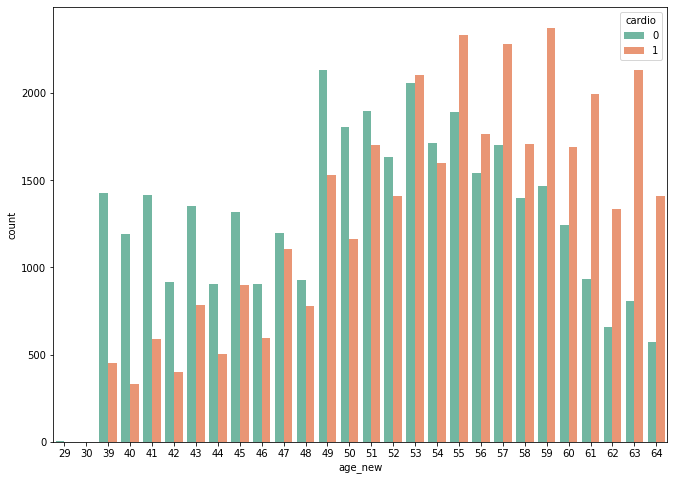

In [ ]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age_new', hue='cardio', data = df_raw, palette="Set2");

From this visual we can assume that people who are 55 greater in age are more exposed to CVD. But both the categorization are seem to be over and less variated which is not good for consider to be modelled because of improper distribution . So we can categorize by 10's of their ages.

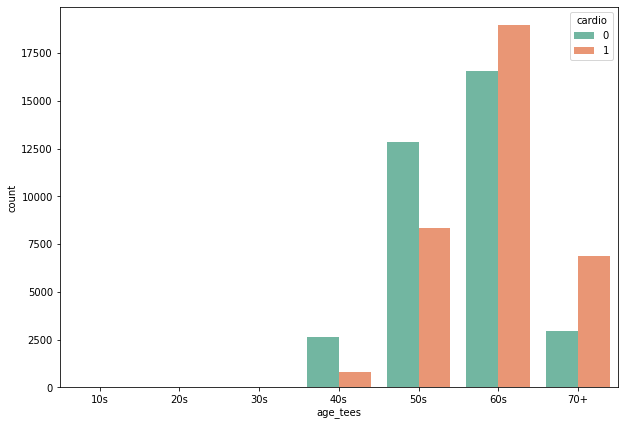

In [ ]:
rcParams['figure.figsize'] = 10, 7
sns.countplot(x='age_tees', hue='cardio', data = df_raw, palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+']);

this graph infer that 60s and 70+ ages are more prone to CVD compare to 40s and 50s. Also there are no CVD patient in 10s, 20s, 30s category. Also , compare to other age visuals it gives more clarity so that we can consider it for FE for modelling.

Coming into gender ratio , in our dataset we have classified gender field by binaries 0 and 1 . We are not sure what 0 and 1 stands for whether its Male or Female .

Basically , Men and Female has certain properties. From our given dataset we can check for following properties and conclude the categories.
* Height - Men are on average heighter than Women
* Alcohol - Men are more into this habit compare to Women
* Gender ratio - Men will be high compare to Women

In [ ]:
# Height comparison 
df_raw.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

On Average , Label 2 is heighter than Label 1.

In [ ]:
# Alcohol consumption 
df_raw.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

Label 2 has more count of Alcohol consumption compare to Label 1 which adds more strenght of Label 2 being Male.

In [ ]:
# Gender Ratio
df_raw['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

This count values says that Label 1 ( Female ) are more compare to Label 2 ( Male )

In [ ]:
# Calcualte the CVD distribution based on Gender
df_raw['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

Almost two gender are equally distributed which is balanced based on ratio.

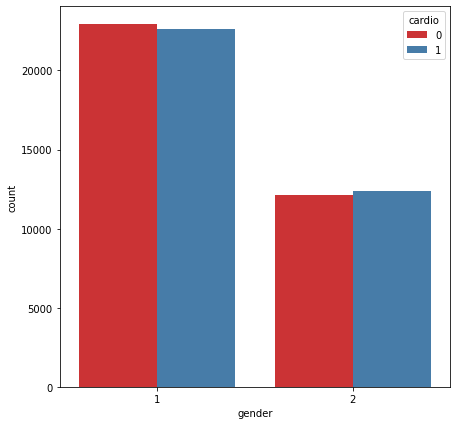

In [ ]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='gender', hue='cardio', data = df_raw, palette="Set1");

Visualizations shows the the disease label is equally distributed but the gender population is not balanced . Label 1 ( Female ) is twice the count of Label 2 ( Male ) . We need to consider Oversampling of Label 2 or Undersamplying of Label 1 to make an unbiased modelling.

Next is analysing height and weight of the patients . We can also caluclate the BMI and check their health condition. 

Initially we analyse the height & weight distribution based on gender.

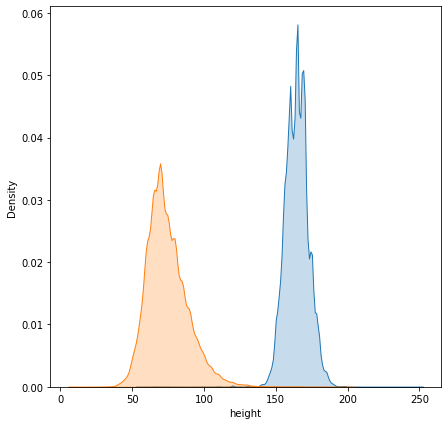

In [ ]:
for col in ["height", "weight"]:
    sns.kdeplot(df_raw[col], shade=True)

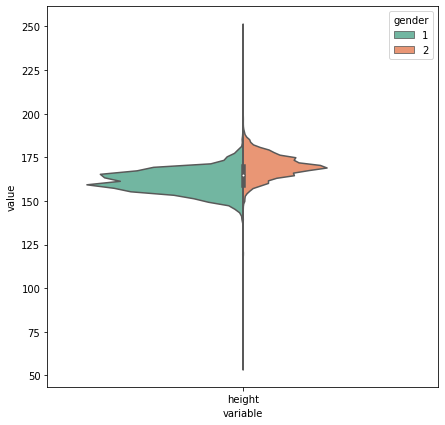

In [ ]:
# Height Distribution
df_melt = pd.melt(frame=df_raw, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

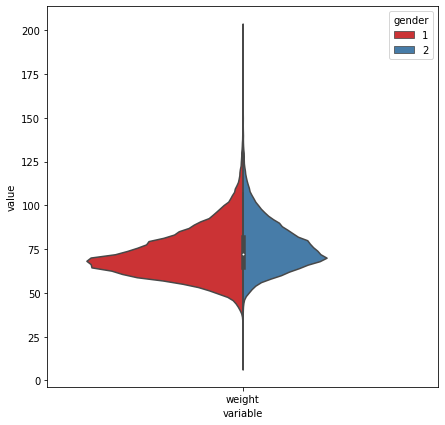

In [ ]:
# Weight Distribution
df_melt = pd.melt(frame=df_raw, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

From the violin plot , the height of label 1 and 2 are slighlt variated where label 1 average is around 161 cm and label 2 is around 169 . But in weights both genders are equally distributed only the population matters.So the weight does not add much value for modelling.

Now let us calculate the BMI of the patients , the BMI says whether the person is in Normal health or not . To calcualte it we have a formula

BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared

**Normal BMI** values are said to be from **18.5 to 25.**

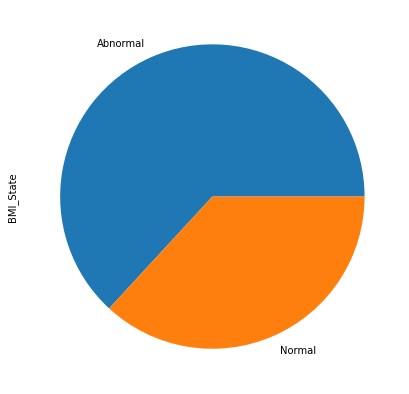

In [ ]:
# calculate the BMI score 
df_raw['BMI'] = df_raw['weight']/((df_raw['height']/100)**2)

# categorize normal & abnormal
def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

df_raw["BMI_State"] = df_raw["BMI"].apply(lambda x: bmi_categorize(x))
df_raw["BMI_State"].value_counts().plot(kind='pie')

The majority of our patients are abnormal . 

Also we need to check how many of them cvd if they have abnormal bmi score.

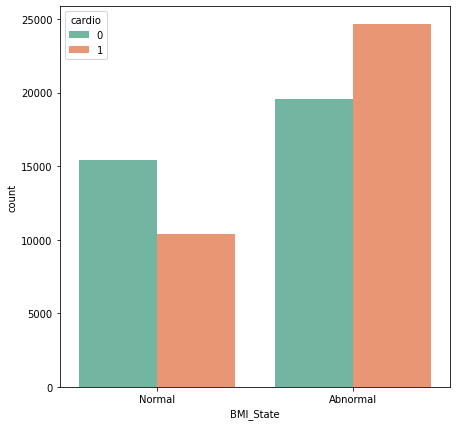

In [ ]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='BMI_State', hue='cardio', data = df_raw, palette="Set2");

This one gave a valuable insight stating that people who follows normal BMI score are less prone to CVD and people with abnormal BMI are having increasing CVD.

But we need to check on what conditions they are abnormal such as alcohol habit, physical activities, smoking etc. How these habits are affecting the BMI state of a patient.

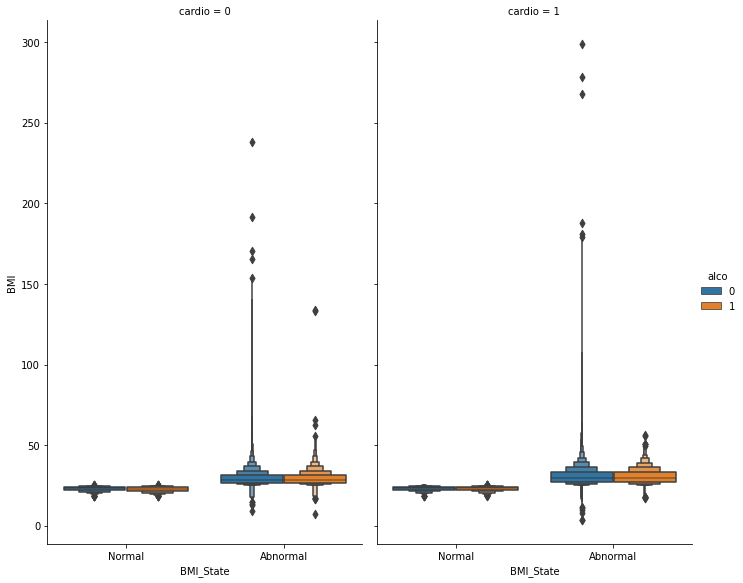

In [ ]:
# comparison plot with alcohol consumption with CVD patients
sns.catplot(x="BMI_State", y="BMI" , hue="alco", col="cardio", data=df_raw, kind="boxen", height=8, aspect=.6);

The plot explains both normal & abnormal person are having equal level of alcohol consumption people for cardio & non cardio patients . So the alcohol factor is not highly influencing the BMI factor. But we need to check whether alcohol consumption impacts cardio diesease.

According to American Health board , the factors which are increasing risk of CVD are :
* **High blood pressure (hypertension)**
* **Abnormal cholesterol and high triglycerides**
* **Obesity**
* **Lack of physical activity**
* **Poorly controlled blood sugars (too high) or out of normal range**
* **Smoking**

Reference Link : [CVD-Heart.org](https://www.heart.org/en/health-topics/diabetes/why-diabetes-matters/cardiovascular-disease--diabetes)

From our available data and with your visualizations we need to prove these factors are true or atleast a strong inference to assume it is false.


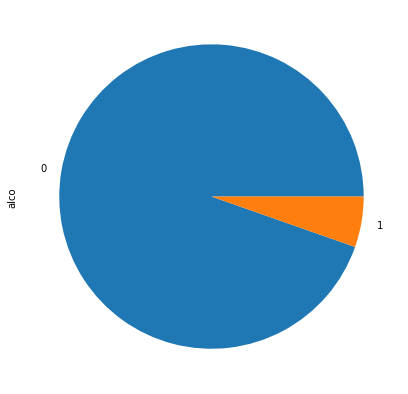

In [ ]:
# Alcohol consumption 
df_raw["alco"].value_counts().plot(kind='pie')

The patients are majorly non-alcoholic. But we need to check , the alcoholic are prone to cardio disease.

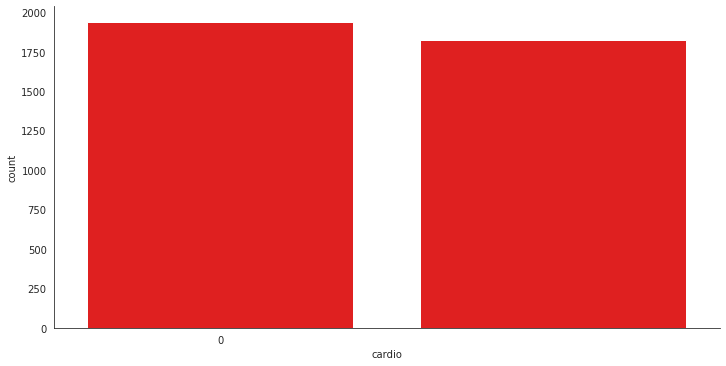

In [ ]:
# segregate data based on patients having Cvdd "1"
df_cardio_alco = df_raw.loc[df_raw["alco"] == 1]
with sns.axes_style('white'):
    g = sns.factorplot("cardio", data=df_cardio_alco, aspect=2,
                       kind="count", color='red')
    g.set_xticklabels(step=5)

By plots and dataset given , alcohol consumption does not seem to be contributing feature to cardio disease classification. If alcohol consumption seems to be factor it should have high cardio disease count.

Now let us take a look for smoking and physical activity factor.

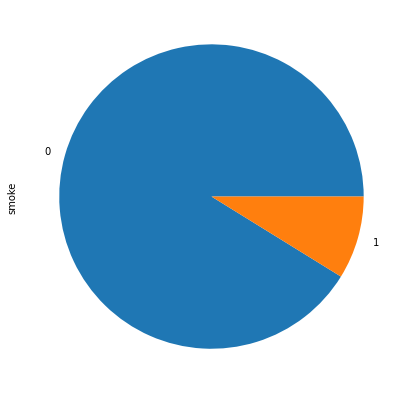

In [ ]:
df_raw["smoke"].value_counts().plot(kind='pie')

The patients are majorly non-smokers. But we need to check , the smokers are prone to cardio disease.

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("smoke", data=df_raw, aspect=4.0, kind='count',
                       hue='cardio', palette="Set2")
    g.set_ylabels('Number of Patients')

One thing to observe is , the non smokers are somewhat more prone to cardio disease compare to smoking person with non cardio disease . May be the dataset seem to be polluted. 

In [ ]:
df_raw["active"].value_counts().plot(kind='pie')

There are more physically active people in the dataset.

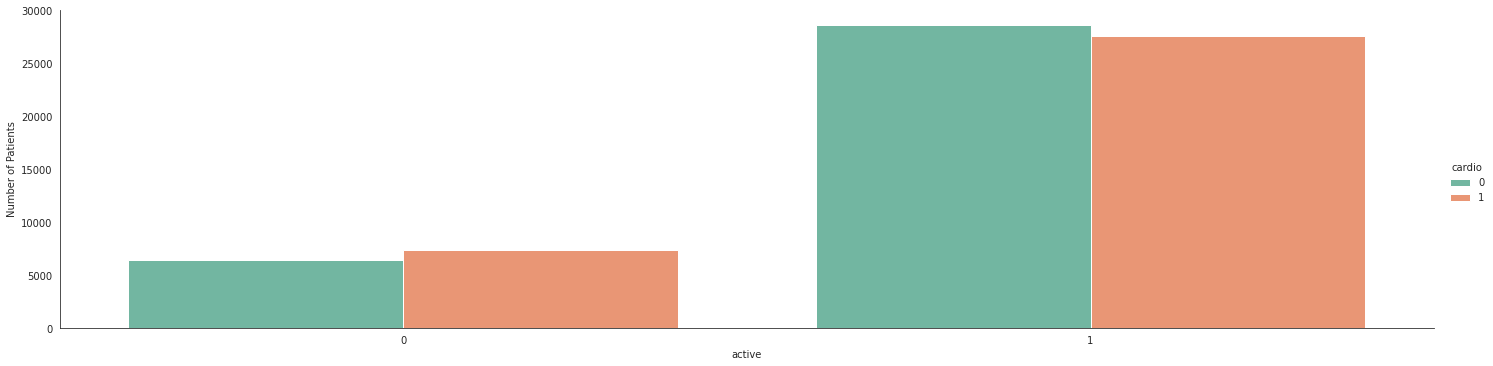

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("active", data=df_raw, aspect=4.0, kind='count',
                       hue='cardio', palette="Set2")
    g.set_ylabels('Number of Patients')

This analysis gives a nice picture stating that physically active people are not prone to cardio disease comparing to physicall active people suffers from cardio disease.


From this three external features and its visualization , we can conclude that:

* **Alcohol** : There are **more non alcoholic patients** compare to alcoholic and there distribution to cardio active patients is quiet opposite.
* **Smoking** : There are **more non smokers** compare to smokers. The patients who are non-smokers are more prone to CVD.
* **Physical Activity** : There are **more physically active patients** compare to physically inactive people. The physical active people are less prone to this CVD.

Next is , Blood Pressure (BP).Blood pressure is the pressure of circulating blood on the walls of blood vessels. Most of this pressure is due to work done by the heart by pumping blood through the circulatory system. 

Blood pressure is recorded as two numbers:

* **Systolic blood pressure (the first number)** – indicates how much pressure your blood is exerting against your artery walls when the heart beats.
* **Diastolic blood pressure (the second number)** – indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats.

According to American Heart Association

![blood_pressure](https://i.postimg.cc/bwzm4sq5/blood.jpg)

For **Systolic blood pressure** , the range should be **120 - 180 mm**.

For **Diastolic blood pressure** , the range should be **80 - 120 mm**.

A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.

Thus we can drop the ap_hi outlier values over 250 and ap_lo outlier values over 200, without fear of missing data.


But to make our analysis firm we can do our visualizations for systolic and diastolic pressure.

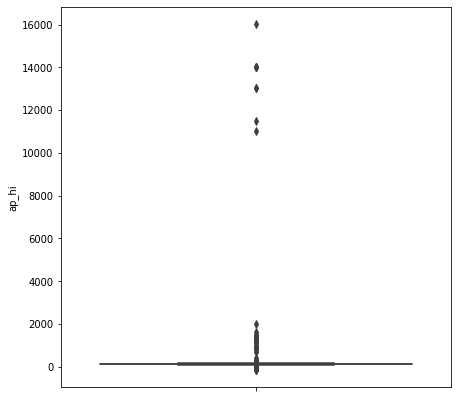

In [ ]:
# box plot got systolic blood pressure
sns.boxplot( y=df_raw["ap_hi"] )

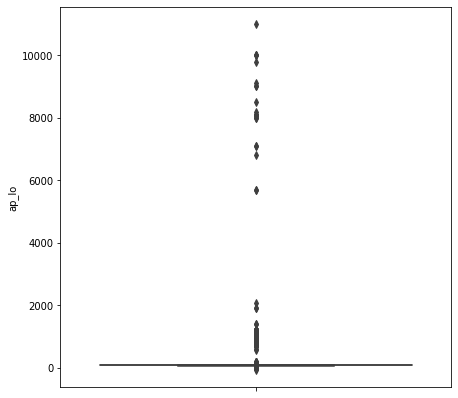

In [ ]:
# box plot got diastolic blood pressure
sns.boxplot( y=df_raw["ap_lo"] )

You can see there are lot of outliers in this two features.

First step , we can remove the outliers and classify the patients based on blood pressure category level.



In [ ]:
out_filter = ((df_raw["ap_hi"]>250) | (df_raw["ap_hi"]>250) | (df_raw["ap_lo"]>200) )
print("There is {} outlier".format(df_raw[out_filter]["cardio"].count()))

There is 993 outlier


In [ ]:
# removing outliers
df_outlier_raw = df_raw[~out_filter]

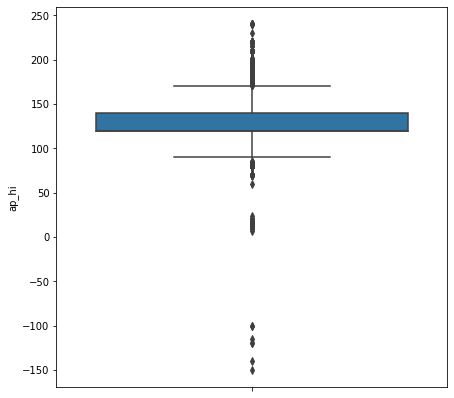

In [ ]:
# checking the box plot got systolic blood pressure after outlier cleaning
sns.boxplot( y=df_outlier_raw["ap_hi"] )

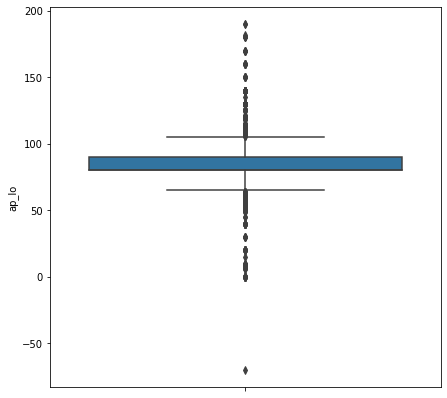

In [ ]:
# checking the box plot got diastolic blood pressure after outlier cleaning
sns.boxplot( y=df_outlier_raw["ap_lo"] )

After removing the outliers , we can get the clear picture of the distribution of systolic and diastolic pressure.

Now we can categorize the blood pressure by their category range

In [ ]:
df_raw.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_new,age_cat,age_tees,BMI,BMI_State
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Middle Aged,60s,26.927438,Abnormal
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Middle Aged,70+,50.472681,Abnormal
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Middle Aged,60s,31.353579,Abnormal
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,Middle Aged,70+,27.099251,Abnormal
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,56,Middle Aged,60s,24.913495,Normal


In [ ]:
def categorize_blood_pressure(x):
  if x['ap_hi'] < 120 and x['ap_lo'] < 80:
    return "Normal"
  elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] < 80:
    return "Elevated"
  elif 130 <= x['ap_hi'] <= 139 or 80 <= x['ap_lo'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['ap_hi'] <= 180 or 90 <= x['ap_lo'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['ap_hi'] > 180 and  x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
    return "Hypertensive Crisis"

# remove outliers
out_filter = ((df_raw["ap_hi"]>250) | (df_raw["ap_hi"]>250) | (df_raw["ap_lo"]>200) )
df_raw = df_raw[~out_filter]
# categorizing blood pressure
df_raw['blood_category'] = df_raw.apply(categorize_blood_pressure, axis=1)
 
df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_new,age_cat,age_tees,BMI,BMI_State,blood_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Middle Aged,50s,21.967120,Normal,High Blood Pressure(Stage 1)
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Middle Aged,60s,34.927679,Abnormal,High Blood Pressure(Stage 2)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Middle Aged,60s,23.507805,Normal,High Blood Pressure(Stage 1)
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Middle Aged,50s,28.710479,Abnormal,High Blood Pressure(Stage 2)
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Middle Aged,50s,23.011177,Normal,Normal


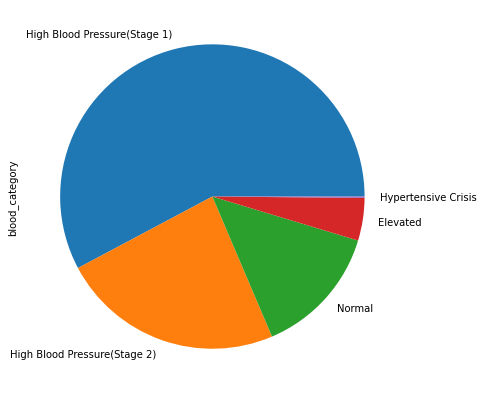

In [ ]:
# Visulization of blood pressure category
df_raw["blood_category"].value_counts().plot(kind='pie')

Most of them are in elevated condition followed by stage 2 and normal.

Let us see which are the categories are mostly suffering from cardio disease.

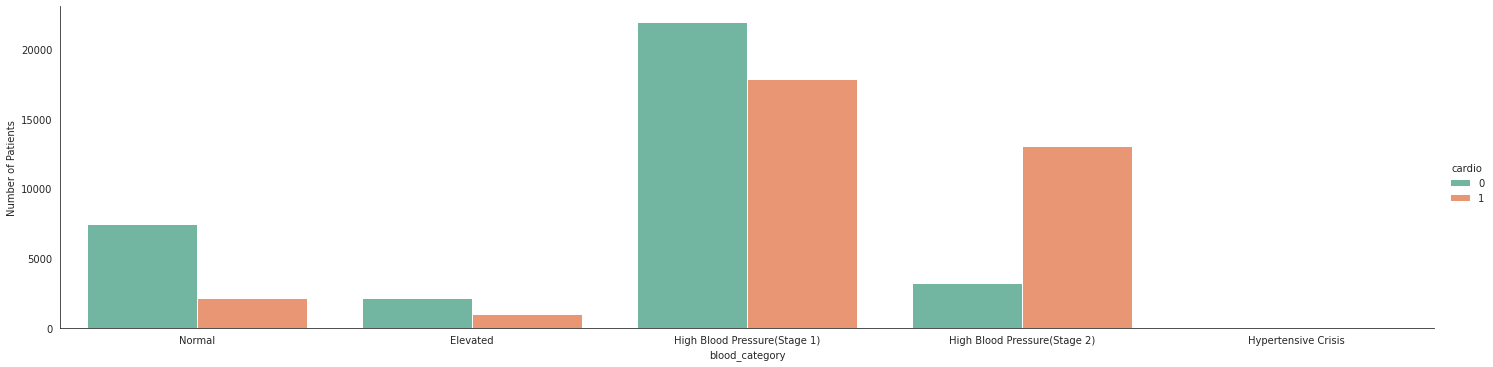

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("blood_category", data=df_raw, aspect=4.0, kind='count',
                       hue='cardio', palette="Set2", order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
    g.set_ylabels('Number of Patients')

This visualization clearing stating that high blood pressure stage 2 are prone to cardio disease . This feature is highly correlating with the target variable.

Coming to the Cholestrol feature

According to medical study , When there is too much cholesterol in your blood, it builds up in the walls of your arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and blood flow to the heart muscle is slowed down or blocked. The blood carries oxygen to the heart, and if not enough blood and oxygen reach your heart, you may suffer chest pain.

The visualization have to prove that patients having well above normal and above normal should have high ratio of cvdd compare to normal patients.

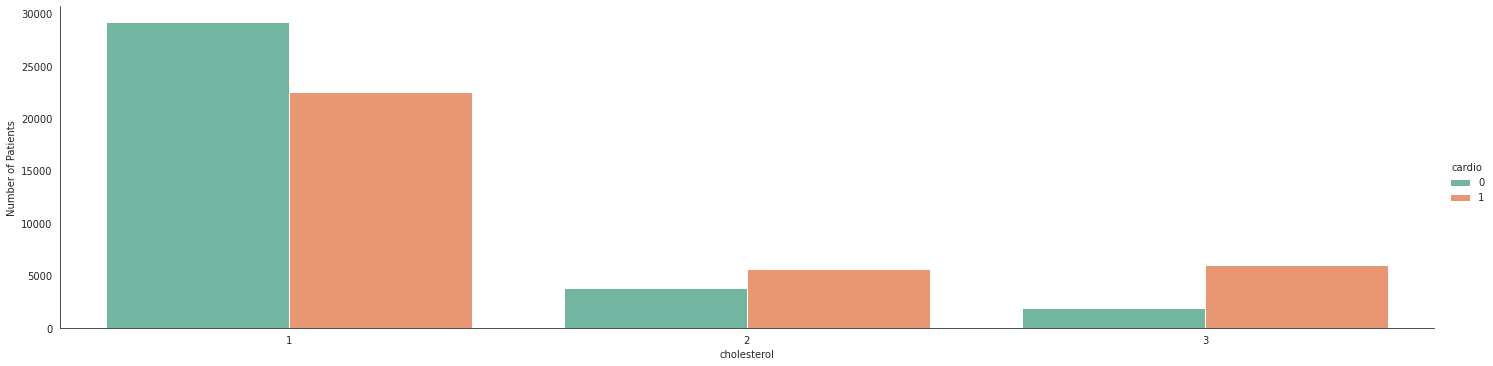

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("cholesterol", data=df_raw, aspect=4.0, kind='count',
                       hue='cardio', palette="Set2")
    g.set_ylabels('Number of Patients')

From this we can infer that , the patients who are having **above normal & well above normal** are the highest risk patient for CVD compare to the normal level cholestrol patients.

Next is the glucose realtion with CVD. But medical studes claiming that the glucose levels are not helpful for impacting CVD target. But anyway we make graph to check that.

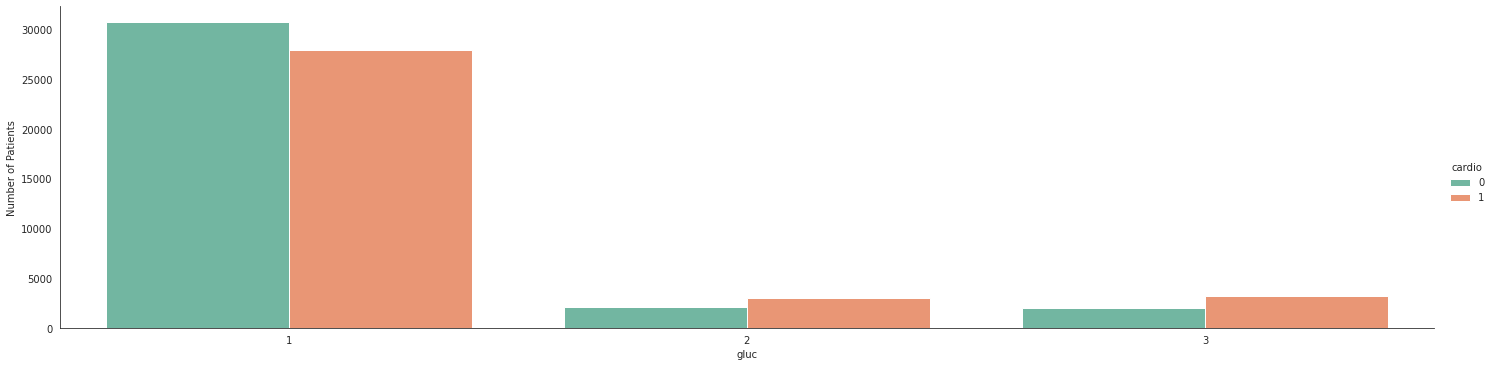

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("gluc", data=df_raw, aspect=4.0, kind='count',
                       hue='cardio', palette="Set2")
    g.set_ylabels('Number of Patients')

Yup thats great, this shows most are maintaining normal glucose level and abnormal patients have high risk to CVD.

Finally we make correlation graph with the engineered features and selected ones, they are :
* 

In [ ]:
# Filtering out the required features
new_df = df_raw[["gender","age_tees","BMI","BMI_State","cholesterol","gluc","active","blood_category","cardio"]].copy()
new_df.head()

,gender,age_tees,BMI,BMI_State,cholesterol,gluc,active,blood_category,cardio
0,2,50s,21.967120,Normal,1,1,1,High Blood Pressure(Stage 1),0
1,1,60s,34.927679,Abnormal,3,1,1,High Blood Pressure(Stage 2),1
2,1,60s,23.507805,Normal,3,1,0,High Blood Pressure(Stage 1),1
3,2,50s,28.710479,Abnormal,1,1,1,High Blood Pressure(Stage 2),1
4,1,50s,23.011177,Normal,1,1,0,Normal,0


In [ ]:
# Checking any missing values
new_df.isnull().sum()

gender            0
age_tees          0
BMI               0
BMI_State         0
cholesterol       0
gluc              0
active            0
blood_category    0
cardio            0
dtype: int64

In [ ]:
# Label encode the categorical columns BMI_State & blood category
le = preprocessing.LabelEncoder()

# BMI_State
le.fit(new_df['BMI_State'])
new_df['BMI_State'] = le.transform(new_df['BMI_State'])

# blood category
le.fit(new_df['blood_category'])
new_df['blood_category'] = le.transform(new_df['blood_category'])

# age tees
le.fit(new_df['age_tees'])
new_df['age_tees'] = le.transform(new_df['age_tees'])

new_df.head()

,gender,age_tees,BMI,BMI_State,cholesterol,gluc,active,blood_category,cardio
0,2,2,21.967120,1,1,1,1,1,0
1,1,3,34.927679,0,3,1,1,2,1
2,1,3,23.507805,1,3,1,0,1,1
3,2,2,28.710479,0,1,1,1,2,1
4,1,2,23.011177,1,1,1,0,4,0


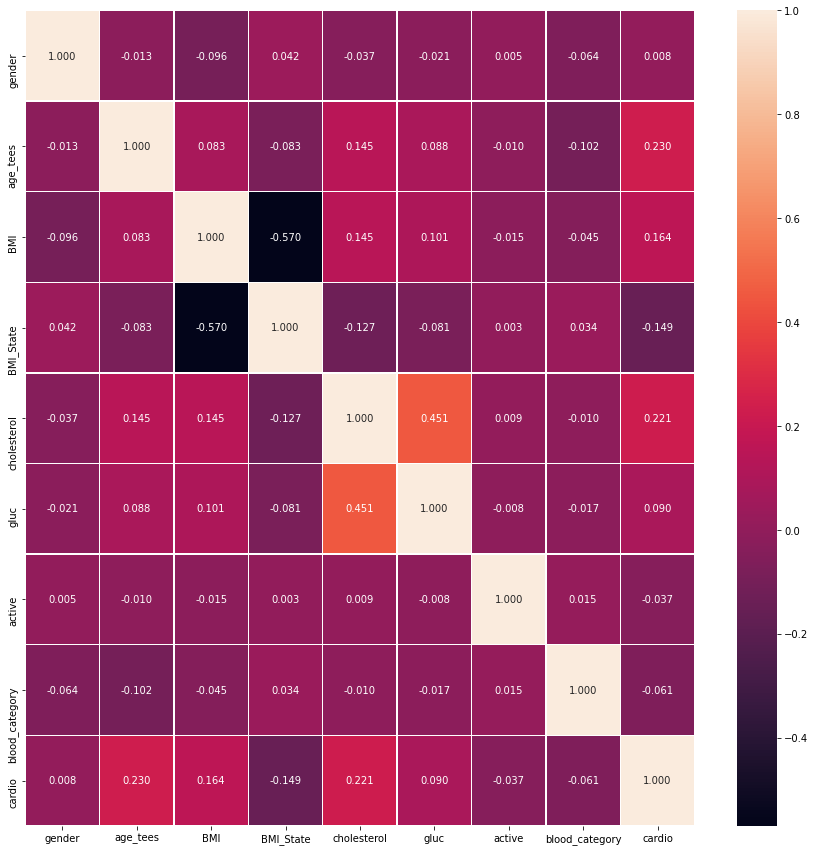

In [ ]:
# plotting correlation map
corr = new_df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)